In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
import statistics
from sklearn.linear_model import LinearRegression
from scipy.stats import dweibull



#1. Project Scope
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.



https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather
#https://www.digitalocean.com/community/tutorials/markdown-markdown-images

[![]("https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg")]
<img src="https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg" alt="Image description" width="900" height="400">

### Introduction
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. The SmartBay test site is located off the North shore of Galway Bay, close to Spiddal. This test site has been in oeration since 2006. 






I have synthesised a dataset of the following 4 variables. 

1. Air Temperature (Degrees C): The temperature of the air can affect the weather. Warm air rises above cold air due to its density. The term temperature gradient is used to describe the temperature differnces between 2 points. A higher temperature gradient leads to a higher wind speed.https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed. My datset is measured in degrees.

2. Barometric Pressure (inches) : This is also known as atmospheric pressure, and is the force exerted by the weigth of the atmosphere on the earths surface. A unit of pressure is a pascal. Barometric Pressure is measured typically by a mercury barometer. Low atmospheric pressure typically leads to wind while high pressure typically leads to calm weather. https://education.nationalgeographic.org/resource/atmospheric-pressure/. Differences in atmospheric pressure genrate winds.

3. Wind Direction (Degrees Magnetic) : this relates to the direction the wind is blowing."It is based on the 360° azimuth circle with the 0/360° azimuth radialaligned  with  magnetic north." https://meteorologytraining.tpub.com/14269/css/14269_56.htm. Wind directions also give rise to distinct local wind patterns that affect specific areas. Sea and land breezes are excellent examples of such patterns. During the day, the land heats up more quickly than the adjacent water, causing air to rise over the land and draw in cooler air from the sea. Therefore, these breezes are called sea breezes. At night, the process reverses, and the land breeze blows from the cooler land towards the warmer water. These processes create land breezes.https://a-z-animals.com/blog/wind-direction-meaning-unraveling-the-significance-and-effects-of-wind-directions/. In ireland, the wind blows from the south and west most often, while flow from the northeast or south least often. https://www.met.ie/climate/what-we-measure/wind

4. Wind Speed (Knot) : This is the rate at which air moves horizontally past a point.  Temperature gradients are higher during winter as a result, and this brings faster wind.
https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed

<img src="https://www.met.ie/cms/assets/uploads/2017/08/Anemoter.jpg" alt="Winf measurement" width="900" height="400">




I will go through the distribuiton I have used to synthesise each variable below.

Wind speed and air pressure, also called barometric pressure, are closely related. Wind is created by air flowing from areas of higher pressure to areas of lower pressure. When the air pressure differs greatly over a small distance, high winds will result.

After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() to have a more concise dataset.https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas

In [3]:
df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',)
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)',"Wind Speed (Meters/Sec)"],axis =1)
df1

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9,1022.6
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1,1022.7
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7,1022.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5,1019.0
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1,1018.1
...,...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,29.6894,251.5,27.0,1005.4
1607,19/02/2016 10:09:15,6.2,29.6865,240.2,23.4,1005.3
1608,19/02/2016 10:14:15,6.2,29.6835,248.6,25.1,1005.2
1609,19/02/2016 10:19:15,6.3,29.6835,246.7,25.7,1005.2


Below is plot of all 4 variables

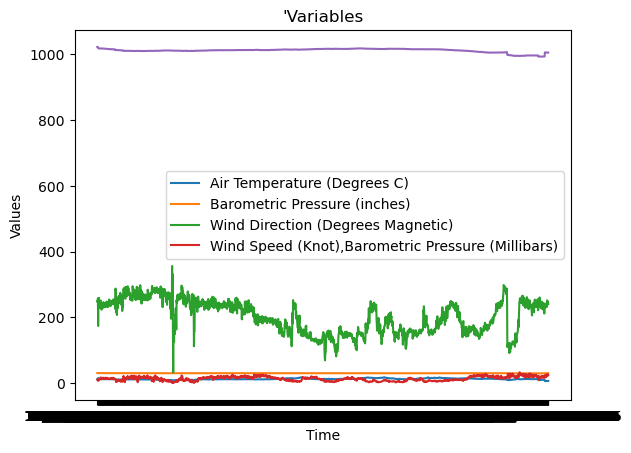

In [4]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (Millibars)")
plt.title("'Variables")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot),Barometric Pressure (Millibars)"])
plt.show()

#Exploring new dataset (df2)
In the code below I add a new column called "datetime". SensorTimestamp column is int 64 bit, with type as a datetime. To filter on a paticular date, I have set the datetime column as the index column. I am filtering data on a 24 hour period  (16th Aug 2015) which has 272 datapoints. This data is the basis i will use to synthesise my new data set. I use the .dtypes and .info() commands to display information on the variablesin my new dataset.

In [5]:
pd.to_datetime(df1['SensorTimestamp'])
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])
df1.set_index('datetime', inplace=True)
df2 =df1.loc[("2015-08-16")]

In [6]:
df2.dtypes

SensorTimestamp                       object
Air Temperature (Degrees C)          float64
Barometric Pressure (inches)         float64
Wind Direction (Degrees Magnetic)    float64
Wind Speed (Knot)                    float64
Barometric Pressure (Millibars)      float64
dtype: object

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2015-08-16 00:00:25 to 2015-08-16 23:56:33
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    272 non-null    object 
 1   Air Temperature (Degrees C)        272 non-null    float64
 2   Barometric Pressure (inches)       272 non-null    float64
 3   Wind Direction (Degrees Magnetic)  272 non-null    float64
 4   Wind Speed (Knot)                  272 non-null    float64
 5   Barometric Pressure (Millibars)    272 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.9+ KB


#Describing my variables
Four of the variables in my dataset are non null float64 variables, also known as the double precision floating point. This datatype is part of the numpy module in python, These usually occupy 64 bits in computer memory. This type of variable can be positive, negative or 0. The IEEE 754 standard specifies a binary64 as having: Sign @ 1 bit,exponent @ 11 bit and Significand precision @ 53 bits (52 explicitly stored) https://en.wikipedia.org/wiki/Double-precision_floating-point_format. These variables are Quantitve, as they are numerical that represent quantities. These are also continious variables as they can take on any values in a range. https://www.statisticshowto.com/quantitative-variables-data/                                                                                                                                       The fifth The remaining variable I created in steps above called "datetime" and is of type datetime64[ns]. This can be either a date unit or time unit. "the date units are years (‘Y’), months (‘M’), weeks (‘W’), and days (‘D’), while the time units are hours (‘h’), minutes (‘m’), seconds (‘s’), milliseconds (‘ms’), and some additional SI-prefix seconds-based units. The datetime64 data type also accepts the string “NAT”, in any combination of lowercase/uppercase letters, for a “Not A Time” value." https://numpy.org/doc/stable/reference/arrays.datetime.html The datetime variable is also Quantitve, and can be classified as a continious variables.

1. Air Temperature (Degrees C)                 float64              
2. Barometric Pressure (inches)                float64
3. Wind Direction (Degrees Magnetic)           float64
4. Wind Speed (Knot)                           float64
5. datetime                                    datetime64[ns]

In [202]:
df2.info("datetime")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2015-08-16 00:00:25 to 2015-08-16 23:56:33
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    272 non-null    object 
 1   Air Temperature (Degrees C)        272 non-null    float64
 2   Barometric Pressure (inches)       272 non-null    float64
 3   Wind Direction (Degrees Magnetic)  272 non-null    float64
 4   Wind Speed (Knot)                  272 non-null    float64
 5   Barometric Pressure (Millibars)    272 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.9+ KB


Plot of filtered dataset with new datetime variable

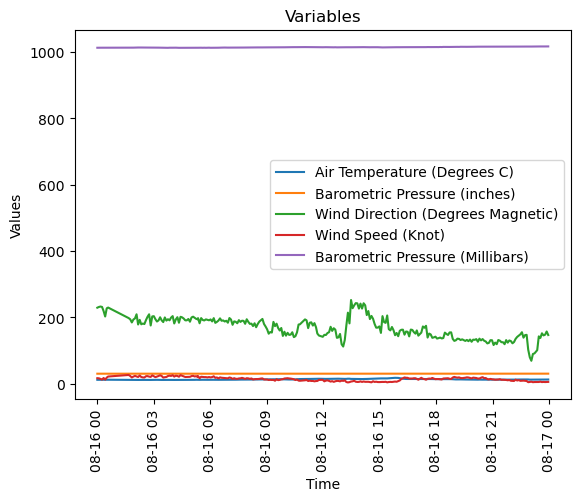

In [203]:
sns.lineplot(data=df2, x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "datetime", y = "Wind Speed (Knot)")
sns.lineplot(data=df2, x = "datetime", y = "Barometric Pressure (Millibars)")
plt.title("Variables")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)","Barometric Pressure (Millibars)"])
plt.show()


I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model later.

In [204]:
df2.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676,1014.639706
std,1.415816,0.034941,32.276567,5.782885,1.183171
min,11.000000,29.908000,68.900000,3.600000,1012.800000
25%,11.700000,29.931600,142.875000,8.575000,1013.600000
50%,12.400000,29.961100,170.050000,14.200000,1014.600000
75%,13.900000,29.982525,191.100000,18.025000,1015.325000
max,17.500000,30.035000,252.200000,26.100000,1017.100000


I dont have a categorical variable in my dataset to model so it impossible to distinguish between variables in below paiplot. I can see however, that there is no clear correlation between the variables. I will examine this later

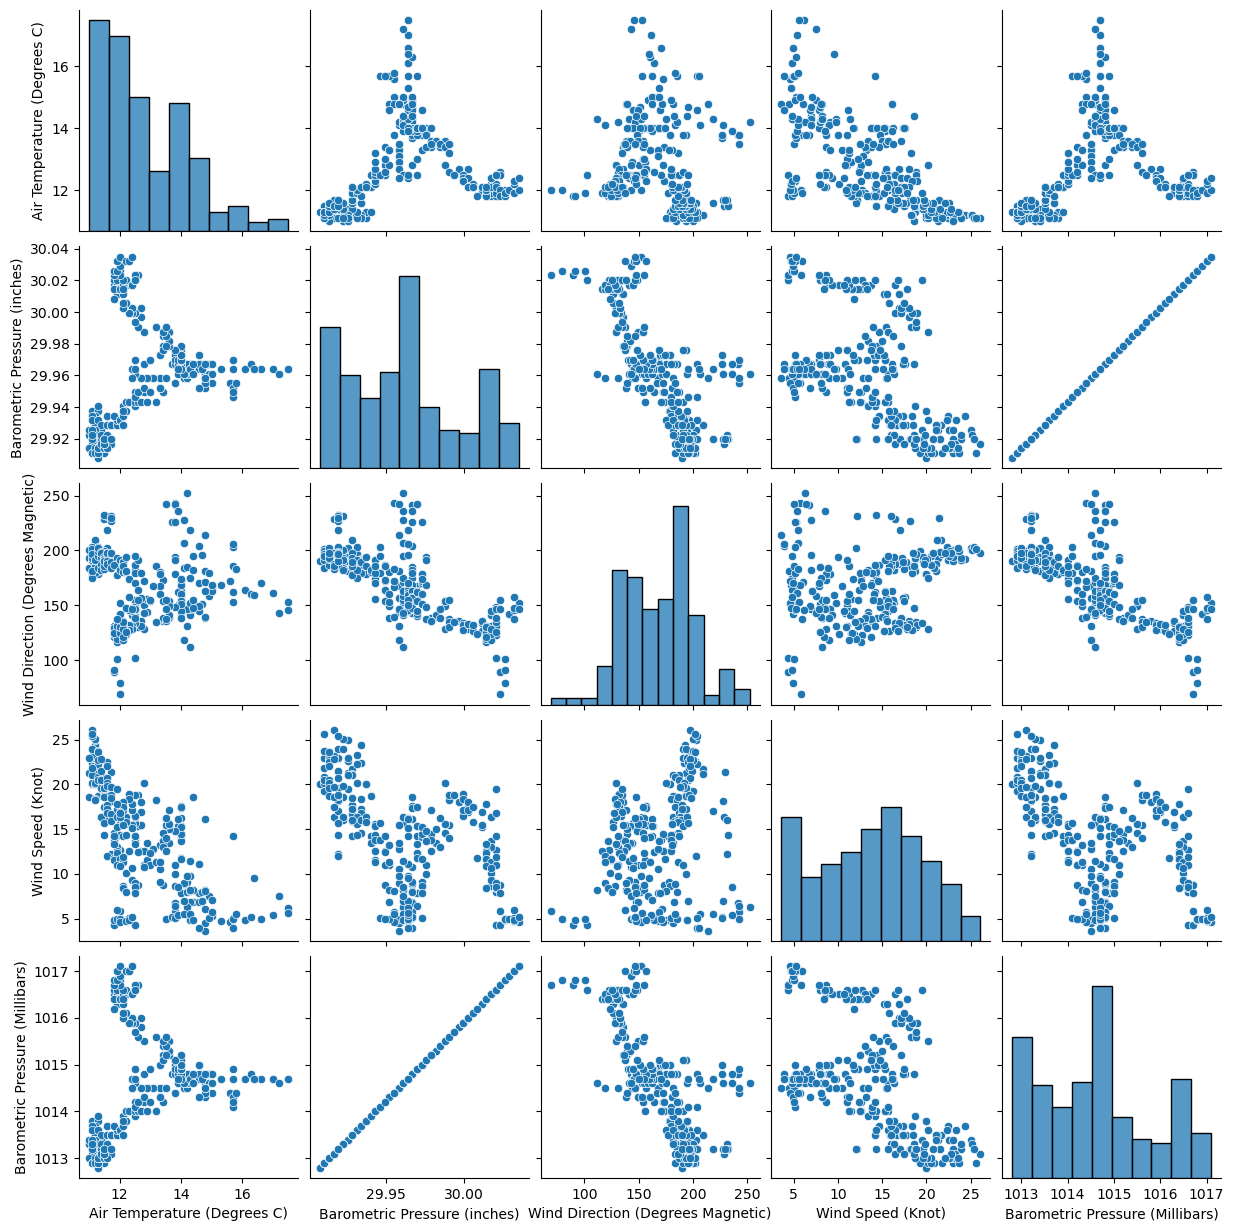

In [205]:
sns.pairplot(df2)
plt.show()

#Synthesisng Data

I have set-up a daterange which will be used when synthseising data. There are 242 datapoints created, and the frequency is minute

In [306]:
idx1 = pd.date_range(start = "2023-11-08 00:00:01", periods=242, freq="MIN",)
idx1

DatetimeIndex(['2023-11-08 00:00:01', '2023-11-08 00:01:01',
               '2023-11-08 00:02:01', '2023-11-08 00:03:01',
               '2023-11-08 00:04:01', '2023-11-08 00:05:01',
               '2023-11-08 00:06:01', '2023-11-08 00:07:01',
               '2023-11-08 00:08:01', '2023-11-08 00:09:01',
               ...
               '2023-11-08 03:52:01', '2023-11-08 03:53:01',
               '2023-11-08 03:54:01', '2023-11-08 03:55:01',
               '2023-11-08 03:56:01', '2023-11-08 03:57:01',
               '2023-11-08 03:58:01', '2023-11-08 03:59:01',
               '2023-11-08 04:00:01', '2023-11-08 04:01:01'],
              dtype='datetime64[ns]', length=242, freq='T')

#Air Temperature (Degrees C)
The first variable I synthesise is called "Synthesised Air Temperature (Degrees C)". To model this, i will use Dweibull distribution.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull 
 The weibull distribuution is a continious probaility distribuion used to model a wide range of random variables http://www.thphys.nuim.ie/Notes/EE304/Notes/LEC10/ExpWeibull_handout.pdf. When synthessing Air Temperature (Degrees C), I am using Dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull, which is a double Weibull continious random variable, typically used to model the failure rate of a system over time. 
I assigned the shape value = mean and scale = std dev as I found by doing this it matches original data set more closely.

In [870]:
mean = 12.801
std_dev = 1.415
shape = mean
scale = std_dev

np.random.seed(61)
ts01 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

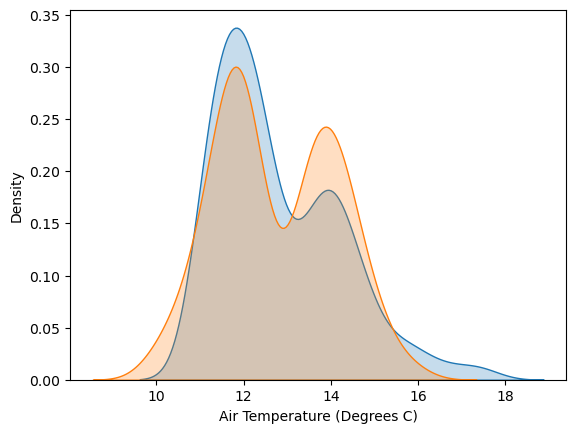

In [871]:
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts01['Synthesised Air Temperature (Degrees C)'],shade=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


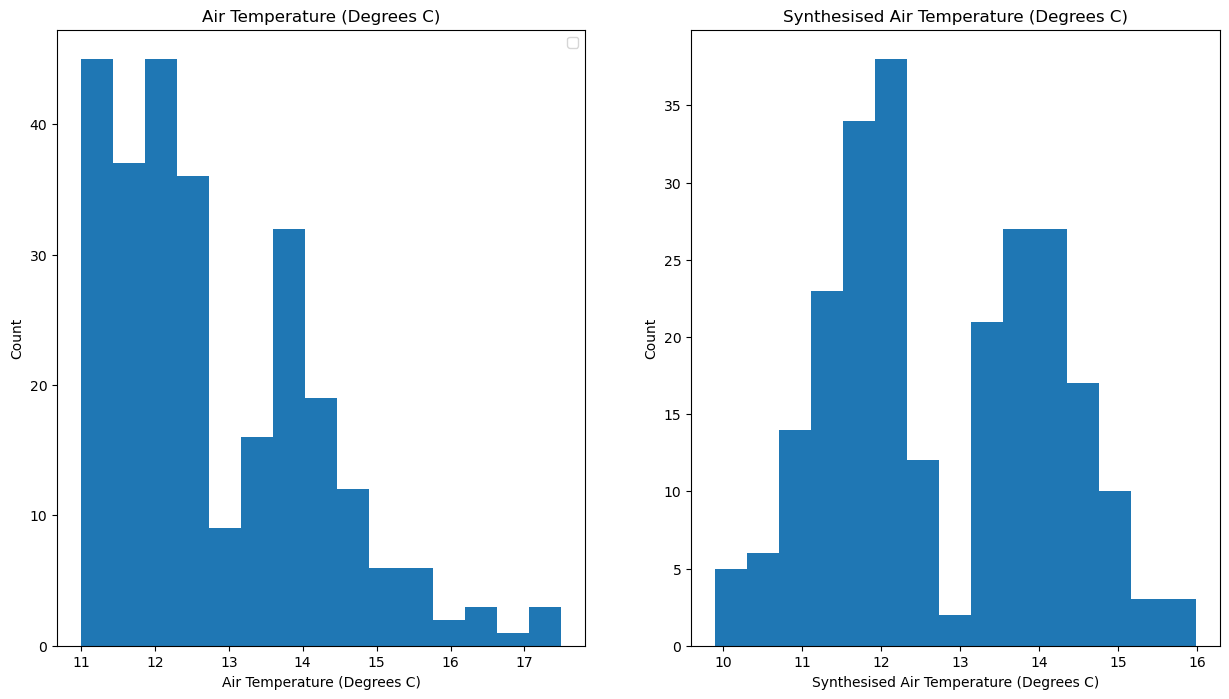

In [894]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Air Temperature (Degrees C)"], bins =15)
plt.xlabel("Air Temperature (Degrees C)")
plt.ylabel("Count")
plt.legend()
plt.title("Air Temperature (Degrees C)")
plt.subplot(1,2,2)
plt.hist(ts01["Synthesised Air Temperature (Degrees C)"], bins =15)
plt.xlabel("Synthesised Air Temperature (Degrees C)")
plt.ylabel("Count")
plt.title("Synthesised Air Temperature (Degrees C)")
plt.show()

#Barometric Barometric Pressure (Millibars)
The next variable I synthesises is called "Synthesised Barometric Barometric Pressure (Millibars)". To model this, I will use normal (Gaussian) distribution. This distribution is often called the bell curve due to its shape. The normal distribution is a continious probabilty distribution which is symmetric around the mean. The parameters are loc: (mean), scale: (standard deviation) and size: (number to create) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
 

In [1113]:
df2.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676,1014.639706
std,1.415816,0.034941,32.276567,5.782885,1.183171
min,11.000000,29.908000,68.900000,3.600000,1012.800000
25%,11.700000,29.931600,142.875000,8.575000,1013.600000
50%,12.400000,29.961100,170.050000,14.200000,1014.600000
75%,13.900000,29.982525,191.100000,18.025000,1015.325000
max,17.500000,30.035000,252.200000,26.100000,1017.100000


In [1192]:
mu = 1014.639706
sigma = 1.183171
rng=np.random.default_rng(64)
ts02 = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Barometric Barometric Pressure (Millibars)'])

<AxesSubplot:xlabel='Barometric Pressure (Millibars)', ylabel='Density'>

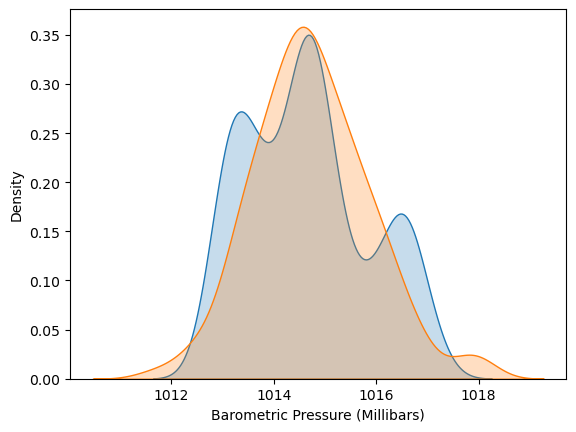

In [1193]:
sns.kdeplot(df2['Barometric Pressure (Millibars)'],shade=True)
sns.kdeplot(ts02['Synthesised Barometric Barometric Pressure (Millibars)'],shade=True)

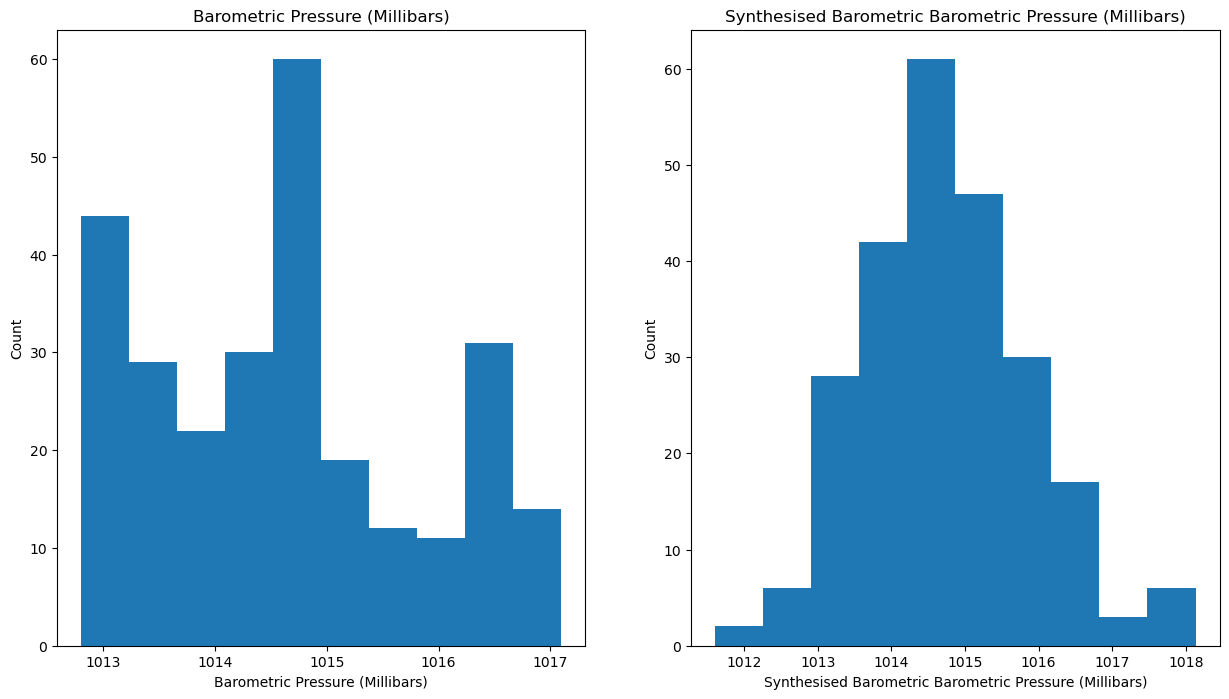

In [1482]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Barometric Pressure (Millibars)"], bins =10)
plt.xlabel("Barometric Pressure (Millibars)")
plt.ylabel("Count")
plt.title("Barometric Pressure (Millibars)")

plt.subplot(1,2,2)
plt.hist(ts02["Synthesised Barometric Barometric Pressure (Millibars)"], bins =10)
plt.xlabel("Synthesised Barometric Barometric Pressure (Millibars)")
plt.ylabel("Count")
plt.title("Synthesised Barometric Barometric Pressure (Millibars)")
plt.show()

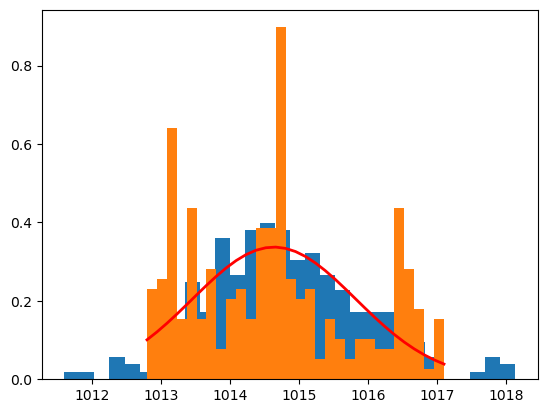

In [1483]:
import matplotlib.pyplot as plt

mu = 1014.639706
sigma = 1.183171
count, bins, ignored = plt.hist(ts02["Synthesised Barometric Barometric Pressure (Millibars)"], 30, density=True)
count, bins, ignored = plt.hist(df2['Barometric Pressure (Millibars)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

###Wind Direction (Degrees Magnetic)
mean and std dev info from .describe above.

In [1484]:
mean = 168.141
std_dev = 32.276
shape = mean
scale = std_dev

np.random.seed(49)
#45,48
ts03 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

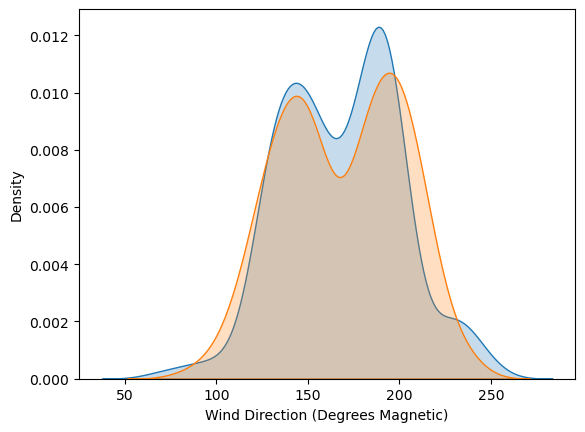

In [1485]:
sns.kdeplot(df2['Wind Direction (Degrees Magnetic)'],shade=True)
sns.kdeplot((ts03['Synthesised Wind Direction (Degrees Magnetic)']),shade=True)

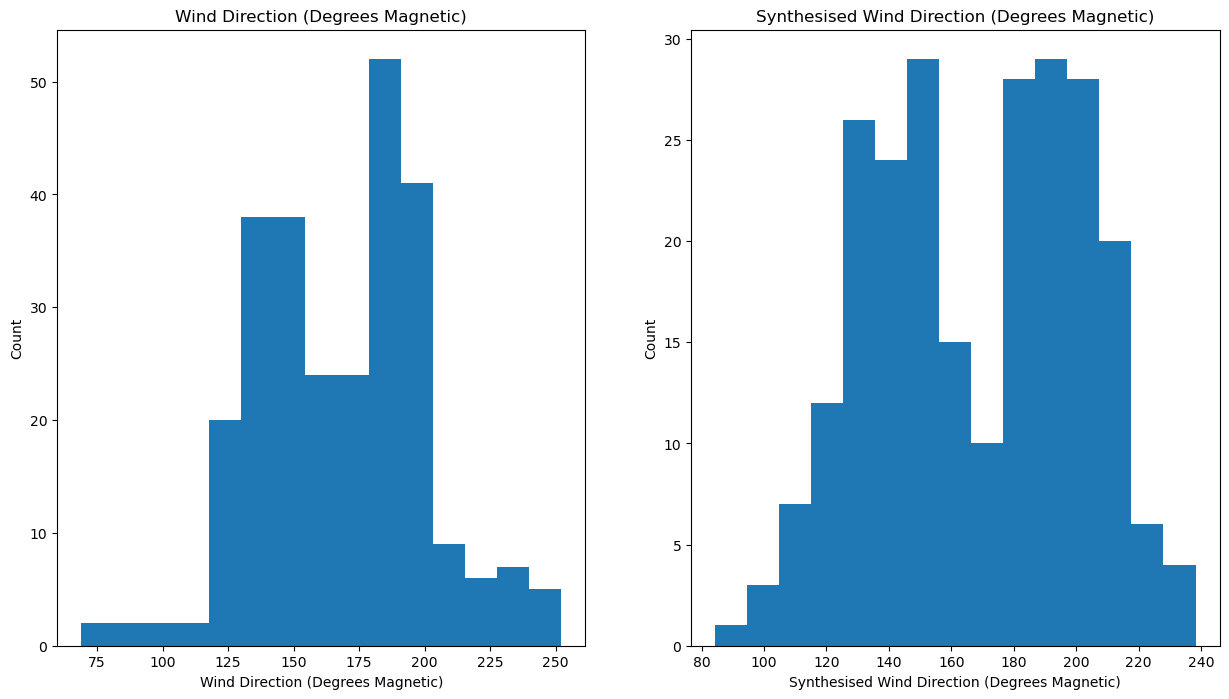

In [1486]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Wind Direction (Degrees Magnetic)"], bins =15)
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.title("Wind Direction (Degrees Magnetic)")

plt.subplot(1,2,2)
plt.hist(ts03["Synthesised Wind Direction (Degrees Magnetic)"], bins =15)
plt.xlabel("Synthesised Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.title("Synthesised Wind Direction (Degrees Magnetic)")
plt.show()

### wind speed knot

In [1622]:
mu  = 13.728676
sigma = 5.782885
rng=np.random.default_rng(seed=53)
#rng1 = np.random.default_rng()
mu1, sigma1 = 13.72, 5.78
ts04 = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot) normal'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

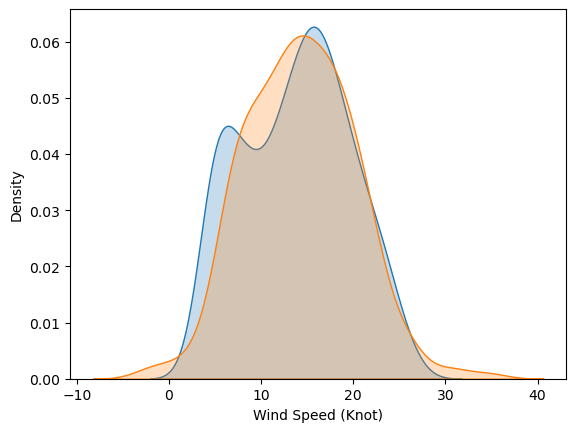

In [1623]:
sns.kdeplot(df2['Wind Speed (Knot)'],shade=True)
sns.kdeplot((ts04['Synthesised Wind Speed (Knot)']),shade=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


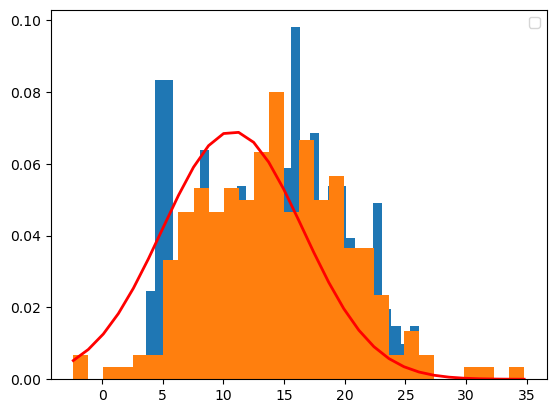

In [1656]:
import matplotlib.pyplot as plt

mu1 = 13.72,
sigma =5.78
count, bins, ignored = plt.hist(df2['Wind Speed (Knot)'], 30, density=True)
count, bins, ignored = plt.hist(ts04['Synthesised Wind Speed (Knot)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.legend()
plt.show()

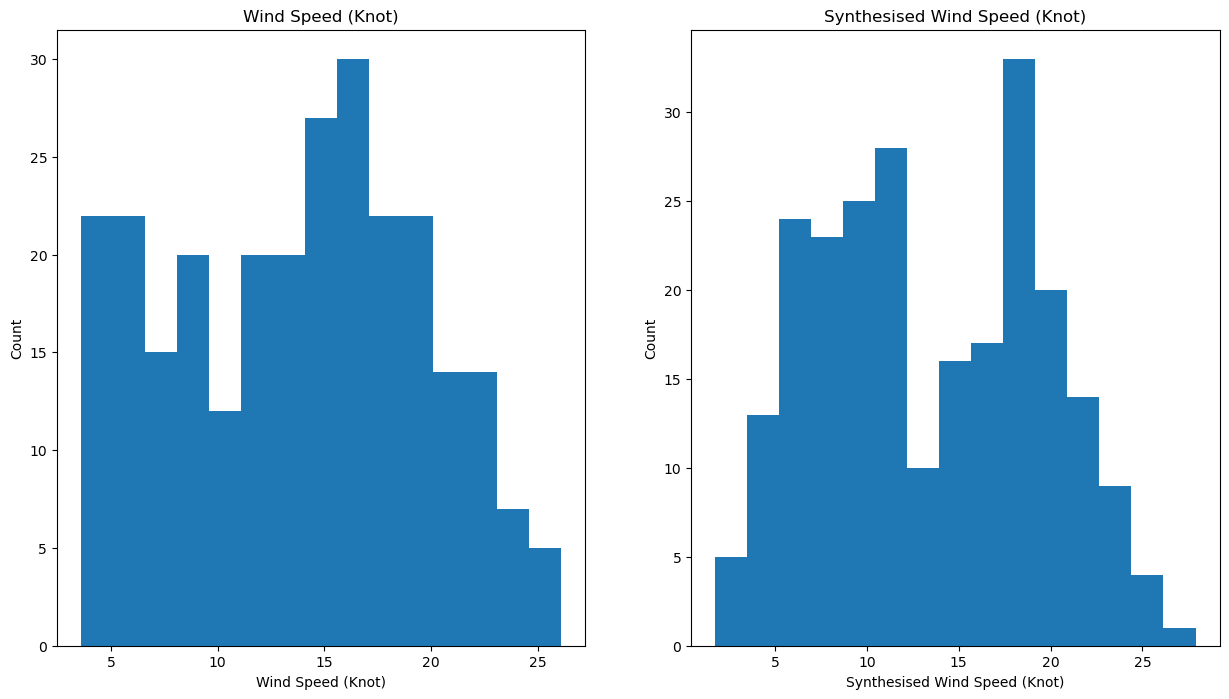

In [1718]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Wind Speed (Knot)"], bins =15)
plt.xlabel("Wind Speed (Knot)")
plt.ylabel("Count")
plt.title("Wind Speed (Knot)")

plt.subplot(1,2,2)
plt.hist(ts04["Synthesised Wind Speed (Knot)"], bins =15)
plt.xlabel("Synthesised Wind Speed (Knot)")
plt.ylabel("Count")
plt.title("Synthesised Wind Speed (Knot)")
plt.show()

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
f.summary()


In [1719]:
df2.describe()


,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676,1014.639706
std,1.415816,0.034941,32.276567,5.782885,1.183171
min,11.000000,29.908000,68.900000,3.600000,1012.800000
25%,11.700000,29.931600,142.875000,8.575000,1013.600000
50%,12.400000,29.961100,170.050000,14.200000,1014.600000
75%,13.900000,29.982525,191.100000,18.025000,1015.325000
max,17.500000,30.035000,252.200000,26.100000,1017.100000


some ditsributions i tried to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

###standard cauch code below taken from https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html. The min and max values were calculated in .describe() output.

Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is  [[ 1.         -0.33065191]
 [-0.33065191  1.        ]]


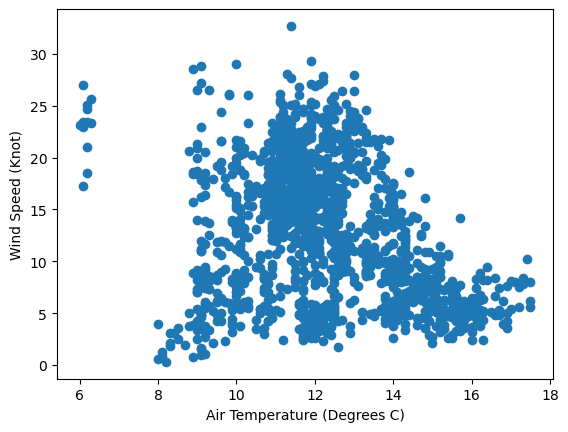

In [1720]:


x =df1["Air Temperature (Degrees C)"]
y =df1["Wind Speed (Knot)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is ", r)
plt.scatter(x, y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Speed (Knot)')
plt.show()


Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is  [[ 1.         -0.11180902]
 [-0.11180902  1.        ]]


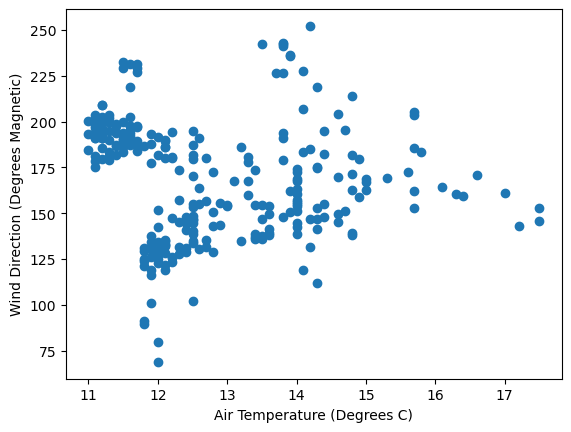

In [1721]:
x =df2["Air Temperature (Degrees C)"]
y =df2["Wind Direction (Degrees Magnetic)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Direction (Degrees Magnetic)')
plt.show()

Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (inches) is  [[1.         0.21890284]
 [0.21890284 1.        ]]


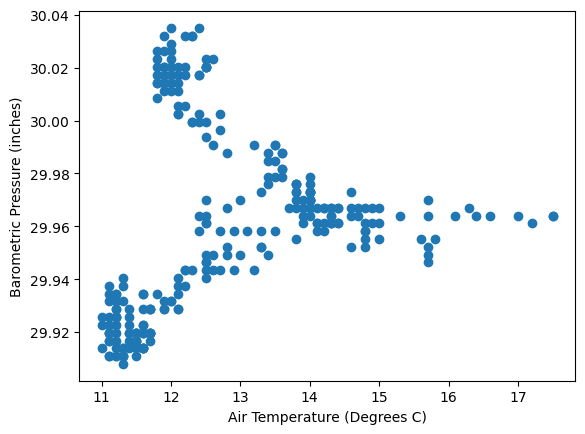

In [1722]:
x =df2["Air Temperature (Degrees C)"]
y =df2["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is  [[1.         0.22993643]
 [0.22993643 1.        ]]


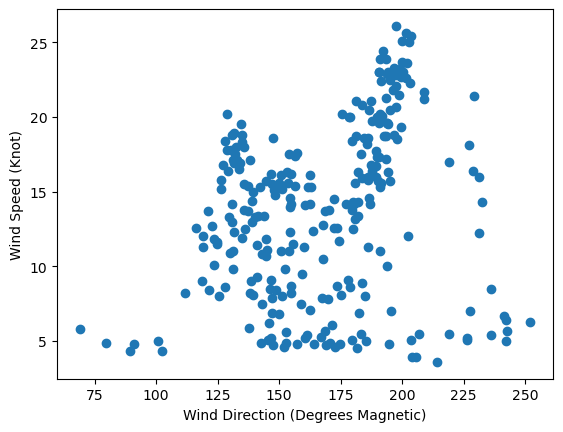

In [1723]:
x =df2["Wind Direction (Degrees Magnetic)"]
y =df2["Wind Speed (Knot)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (inches) is  -0.7453638928778373


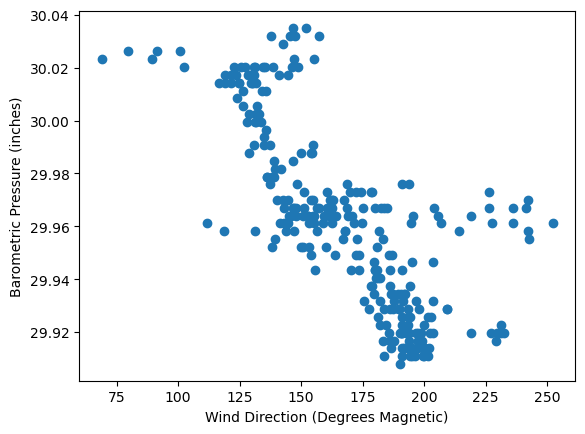

In [1724]:
x =df2["Wind Direction (Degrees Magnetic)"]
#x = df22["Barometric Pressure (inches)"]
y =df2["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)[0,1]
print("Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (inches) is  [[ 1.         -0.52554845]
 [-0.52554845  1.        ]]


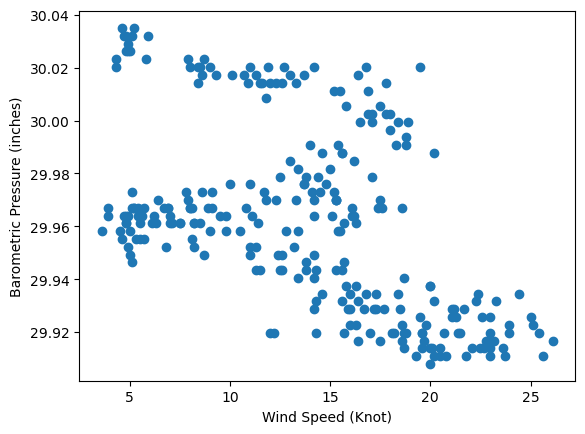

In [1725]:
x =df2["Wind Speed (Knot)"]
y =df2["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Speed (Knot)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

#standard gamma

for Air temp , Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406

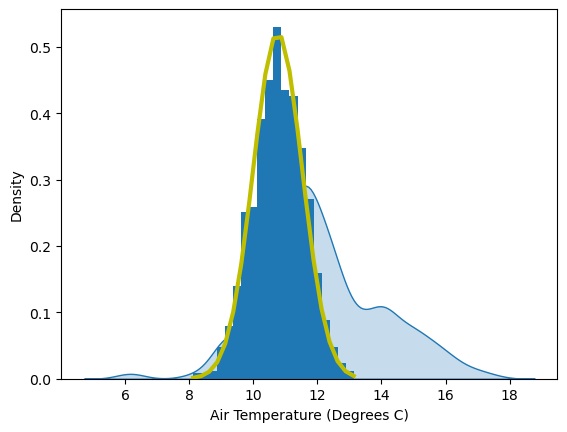

In [1726]:
mu, sigma = 10.76, .766
s = np.random.normal(mu, sigma, 1000) # Mean is 40 and std is 1.

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
sns.kdeplot(df1['Air Temperature (Degrees C)'],shade=True)
plt.show()

In [1727]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [1728]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

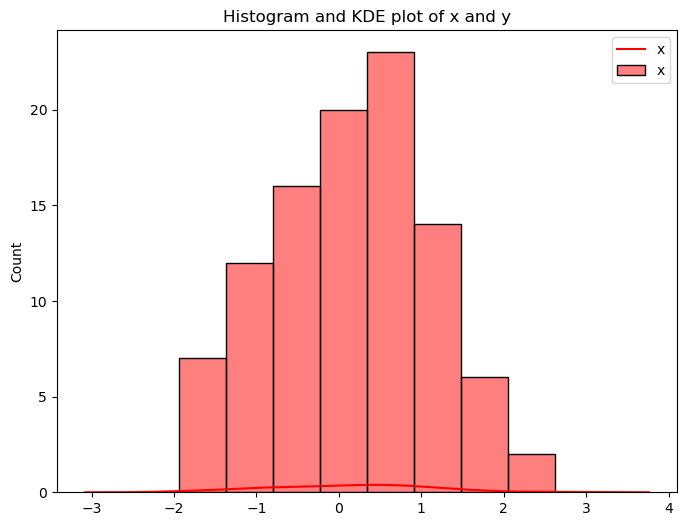

In [1729]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [1730]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [1731]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:01,245.637167
2023-11-08 00:01:01,263.681654
2023-11-08 00:02:01,246.997676
2023-11-08 00:03:01,273.130249
2023-11-08 00:04:01,276.305072
...,...
2023-11-08 03:57:01,251.252544
2023-11-08 03:58:01,279.101391
2023-11-08 03:59:01,281.113796
2023-11-08 04:00:01,264.366017


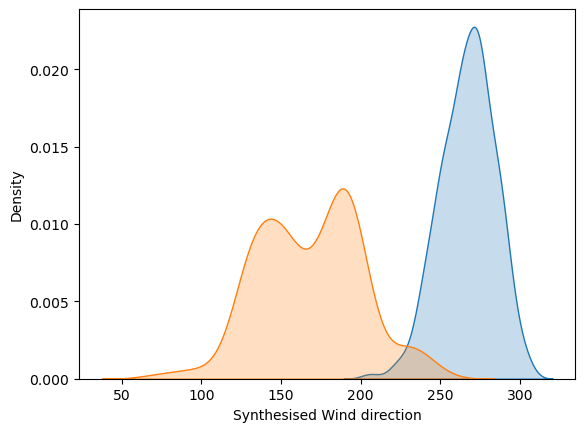

In [1732]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df2['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [1733]:
import numpy as np
dt = np.random.poisson(10.76, 100)
#dt

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

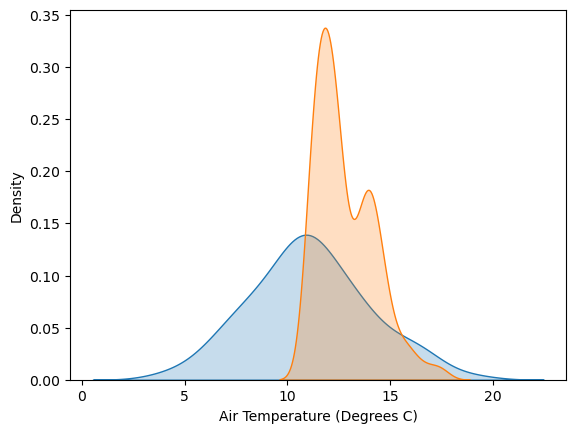

In [1734]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True)

In [1735]:

values = np.random.rayleigh(10.76, 200)
#values

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

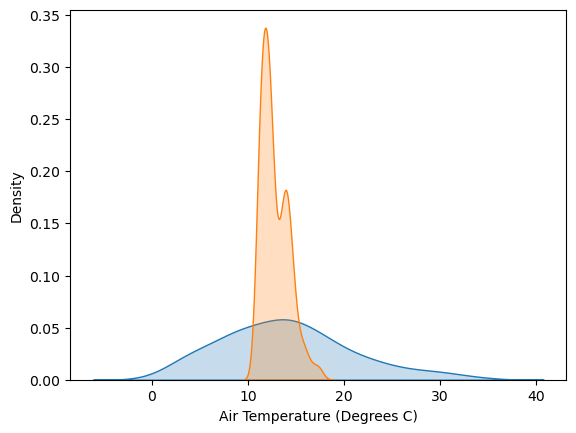

In [1736]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True)

In [1737]:
df2.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676,1014.639706
std,1.415816,0.034941,32.276567,5.782885,1.183171
min,11.000000,29.908000,68.900000,3.600000,1012.800000
25%,11.700000,29.931600,142.875000,8.575000,1013.600000
50%,12.400000,29.961100,170.050000,14.200000,1014.600000
75%,13.900000,29.982525,191.100000,18.025000,1015.325000
max,17.500000,30.035000,252.200000,26.100000,1017.100000


In [1738]:
result=pd.concat([ts01,ts02,ts03,ts04],axis =1)
result

,Synthesised Air Temperature (Degrees C),Synthesised Barometric Barometric Pressure (Millibars),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot)
2023-11-08 00:00:01,14.029519,1014.021471,139.848492,19.027869
2023-11-08 00:01:01,12.153269,1014.427169,141.878757,22.461093
2023-11-08 00:02:01,13.589047,1012.940035,236.958362,15.080299
2023-11-08 00:03:01,10.462027,1015.388953,196.842360,21.232695
2023-11-08 00:04:01,14.108863,1016.236217,235.859209,19.249761
...,...,...,...,...
2023-11-08 03:57:01,11.442629,1014.219237,121.491178,23.056778
2023-11-08 03:58:01,12.519459,1015.132742,163.487728,16.237517
2023-11-08 03:59:01,9.898467,1014.751231,140.736370,16.361275
2023-11-08 04:00:01,11.127317,1016.011519,187.961406,6.295180


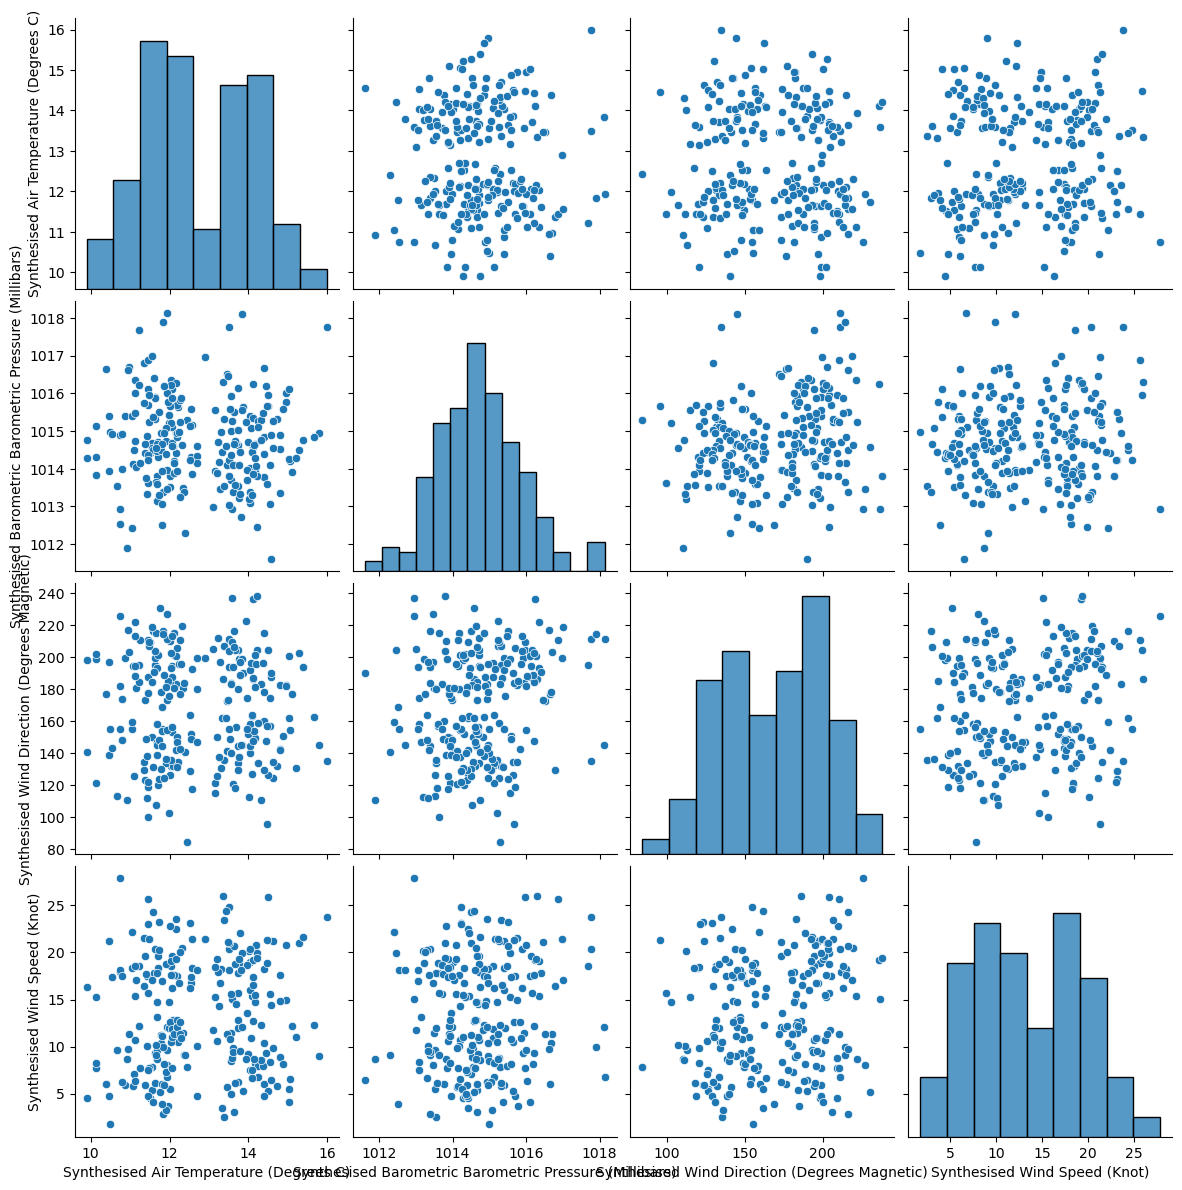

In [1739]:
sns.pairplot(result, height=3, aspect=1)


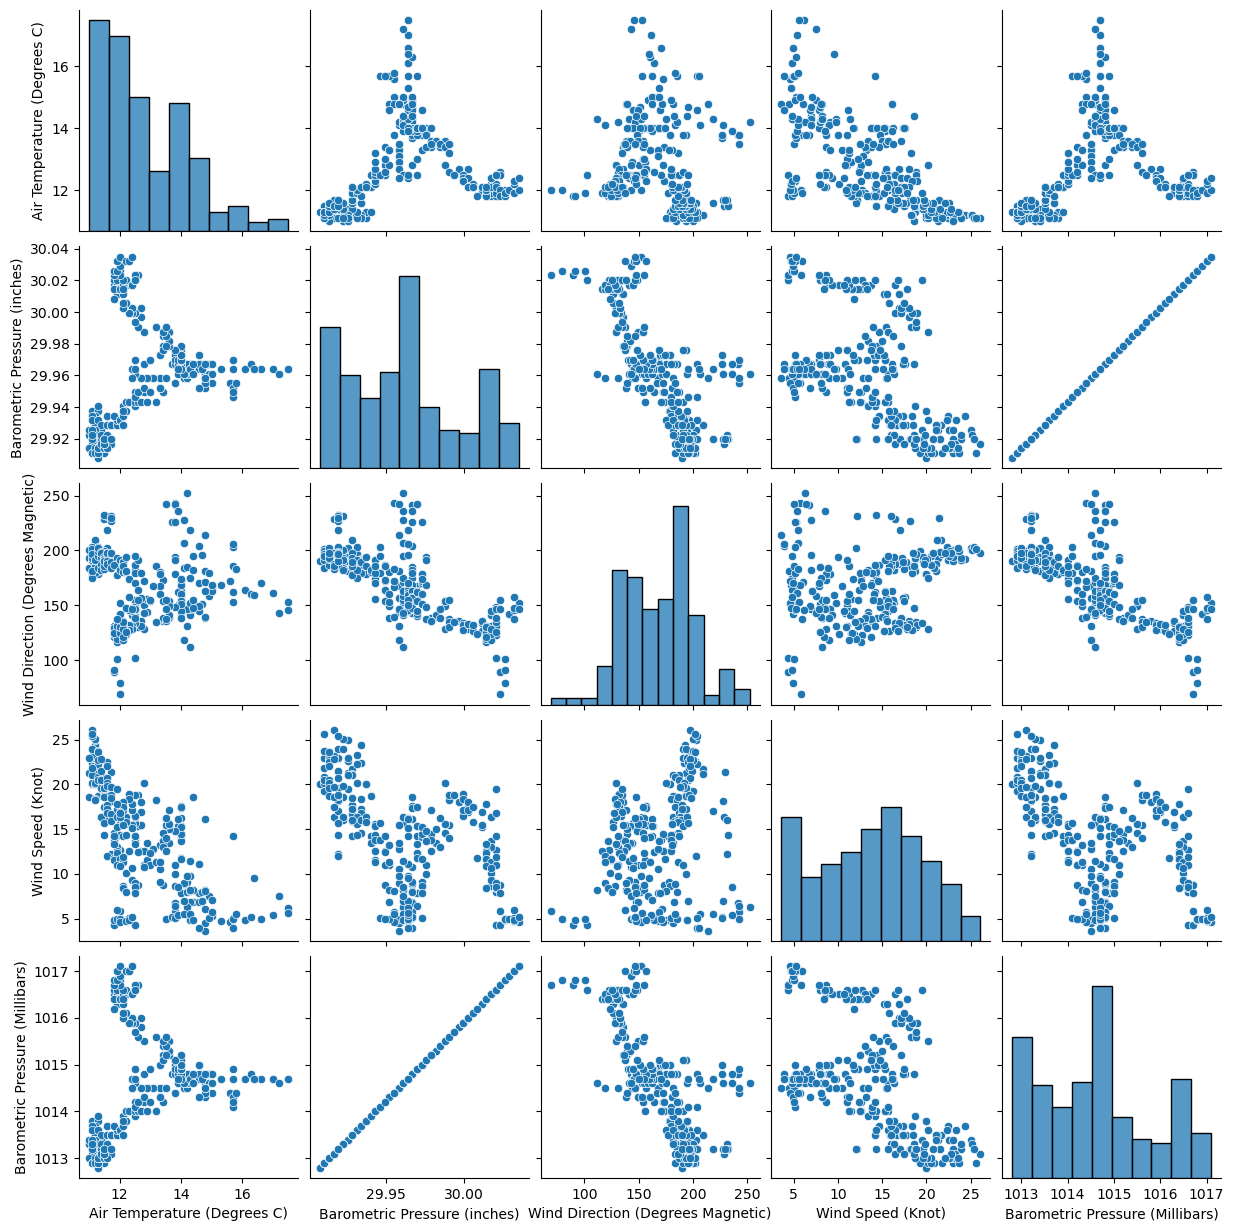

In [1740]:
sns.pairplot(df2, aspect=1)

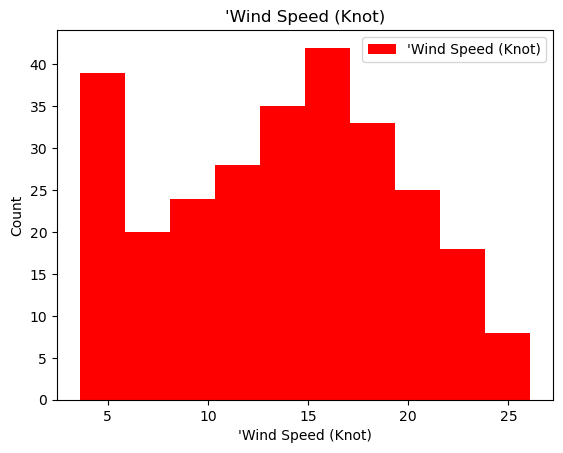

In [1741]:
a = df2['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

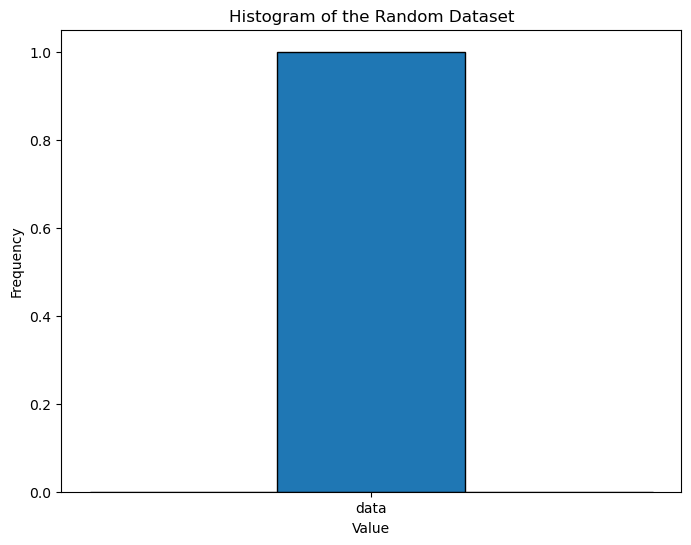

In [1742]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

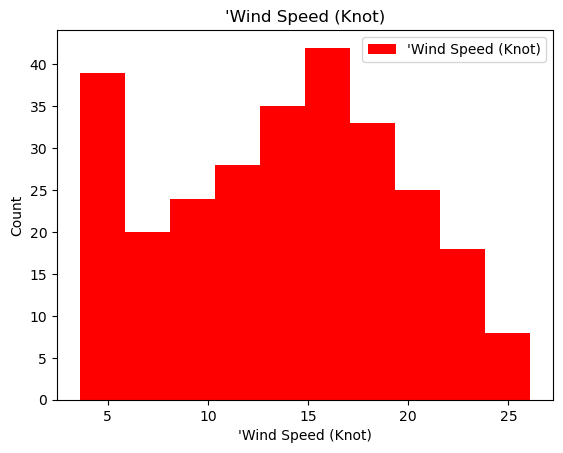

In [1743]:
#a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [1744]:
result.describe()

,Synthesised Air Temperature (Degrees C),Synthesised Barometric Barometric Pressure (Millibars),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot)
count,242.000000,242.000000,242.000000,242.000000
mean,12.739679,1014.740493,168.548844,13.420024
std,1.358044,1.136930,33.187902,5.993394
min,9.898467,1011.603962,84.341425,1.731854
25%,11.673160,1013.950423,141.442124,8.394409
50%,12.384515,1014.658423,173.193667,12.637248
75%,13.914620,1015.413425,196.382876,18.302747
max,15.983331,1018.132343,238.234590,27.893324


In [1745]:

df2.describe()


,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676,1014.639706
std,1.415816,0.034941,32.276567,5.782885,1.183171
min,11.000000,29.908000,68.900000,3.600000,1012.800000
25%,11.700000,29.931600,142.875000,8.575000,1013.600000
50%,12.400000,29.961100,170.050000,14.200000,1014.600000
75%,13.900000,29.982525,191.100000,18.025000,1015.325000
max,17.500000,30.035000,252.200000,26.100000,1017.100000


In [1746]:

#Define the dataset

data = np.loadtxt('data.csv')

#Calculate the mode
mode = statistics.mode(data)

#Print the mode
print("The mode of the dataset is:", mode)

The mode of the dataset is: 12.5


In [1747]:
#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

End